## relation between the linear regression coefficient and RASQUAL $\pi$ parameter


### RASQUAL:

`Ref|Ref   0     :`    $2 \cdot (1-\pi) \cdot \lambda $

`Ref|Alt   1     :`    $\lambda $

`Alt|Alt   2     :`    $2 \cdot \pi \cdot \lambda $



$$ y = \big[ 1- (x-1) \cdot (1 - 2\, \pi) \big] \cdot \lambda $$

$$ y = 2\cdot(1-\pi) \cdot \lambda + x \cdot (2\, \pi - 1) \cdot \lambda $$


### Linear model:

$$ y = \mu + \beta \cdot x $$


### Log-linear model:

$$ \log y = \mu + \beta \cdot x $$

$$ y = e^\mu \cdot e^{\beta \cdot x} $$

### Combining RASQUAL and Log-linear regression

$$ y = 2^\mu \cdot 2^{\beta \cdot x}  = \big[ 1- (x-1) \cdot (1 - 2\, \pi) \big] \cdot \lambda$$

$$ \mu  \equiv \log_2 \lambda$$

$$ \beta \cdot x  \approx \log_2 \!\big[ 1- (x-1) \cdot (1 - 2\, \pi) \big] $$

This does not yet look as a well-posed problem (as the solution is not unique with respect to $\beta$ and depends on $x$). For practical cases, for a range of $x$ we would like the quantities ($\log_2 y$ estimates) on both sides to be as close as possible, so we minimize the distance between them: 


$$ \mathrm{argmin}_\beta E = \mathrm{argmin}_\beta \sum_x \, P[x] \cdot  \left\lVert  \beta \, x  - \log_2 \!\big( 1- (x-1) \cdot (1 - 2\, \pi) \big) \right\rVert_2^2 $$


$$ E = P[x=0] \cdot \left\lVert - \log_2 \!\big( 1 +  (1 - 2\, \pi) \big) \right\rVert_2^2 + \\ 
P[x=1] \cdot  \left\lVert\beta \right\rVert_2^2  + \\
 P[x=2] \cdot  \left\lVert 2\,\beta  - \log_2 \!\big( 1- (1 - 2\, \pi) \big) \right\rVert_2^2
$$

We can define $P[x]$ in three ways:

 1. Assume that all three classes are equally represented (most simple model)
 2. Empirical distribution of genotypes (allele combinations)
 3. Equilibrium combination given allele frequency (useful when empirical data is not available)
 
 
For the most simple model the error function hence can be written as:

$$ E = \left(  \log_2 \!\big( 1 +  (1 - 2\, \pi) \big) \right)^2 
+  ( \beta)^2  +
 \left(2\,\beta  - \log_2 \!\big(  2\, \pi \big) \right)^2 \\
$$


$$ \frac{\partial E}{\partial \beta} =2\, \beta  +
  8\, \beta - 4 \,\log_2 (2 \pi)\\ 
  = 10\, \beta  - 4 \log_2 (2 \pi)
$$


$$ 10\, \beta  - 4 \log_2 (2 \pi) = 0$$


$$ 10\, \beta =  4 \, \log_2 (2 \pi)  $$

$$ \beta =  0.4 \, \log_2 (2 \pi)  $$

### Combining RASQUAL and Log-linear regression [nominal scale]

$$ y = 2^\mu \cdot 2^{\beta \cdot x}  = \big[ 1- (x-1) \cdot (1 - 2\, \pi) \big] \cdot \lambda$$

$$  \mu  \equiv \log_2 \lambda$$

$$ 2^{\beta \cdot x}  \approx \big[ 1- (x-1) \cdot (1 - 2\, \pi) \big]$$

Here for a range of $x$ we would like the quantities (nominal $y$ estimates) on both sides to be as close as possible, so we minimize the distance between them: 


$$ \mathrm{argmin}_\beta E = \mathrm{argmin}_\beta \sum_x \, P[x] \cdot  \left\lVert 
2^{\beta \cdot x}  - \big[ 1- (x-1) \cdot (1 - 2\, \pi) \big]
\right\rVert_2^2 $$



$$ E = P[x=0] \cdot \left\lVert 1 - 2 \cdot (1-\pi)   \right\rVert_2^2 + \\ 
P[x=1] \cdot  \left\lVert 2 ^\beta - 1 \right\rVert_2^2  + \\
 P[x=2] \cdot  \left\lVert 4 ^\beta  - 2 \, \pi
 \right\rVert_2^2
$$

    da^x/dx = a^x log(a)
    (d)/(dx)((a^x-b)^2) = 2 a^x log(a) (a^x-b)

$$ \frac{\partial E}{\partial \beta} = 2 \, \log 2 \big(  2^\beta (2^\beta - 1) \,  + 
 4^\beta (4^\beta- 2\, \pi  ) \big)
$$


$$(2^\beta - 1) \,  + 
  2^\beta  (4^\beta- 2\, \pi  ) = 0
$$

$$ 2^\beta +  2^{3 \beta} - 1 =  2\, 2^\beta \, \pi \, \lambda 
$$

$$ \frac{2^\beta +  2^{3 \beta} - 1}{2 \, 2^\beta} =   \pi 
$$

No closed form for $\beta$

In [1]:
from pandas import read_table as rt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
np.random.seed(0)
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

dpi = 150
plt.matplotlib.rc("savefig", dpi=dpi, transparent=True)
#sns.set(style="white", color_codes=True)
from pandas import read_table as rt

In [153]:
pi = np.arange(0.01, 1.0,0.01).reshape(-1,1)
x = np.r_[0,1,2].reshape(1,-1)
y = 1-(x-1)*(1-2*pi)

def beta_v1(pi):
    return 0.4 * np.log2(2*pi)

beta_exp = beta_v1(pi)
y_exp = 2**(x*beta_exp)
# beta_exp_int = 0.4 * pi* (np.log2(2*pi) -1)
# y_exp_int = 2**(x*beta_exp_int)

def beta_v0(pi):
    return - np.log2(2*(1-pi))

beta_exp_jy = beta_v0(pi)
y_exp_jy = 2**(x*beta_exp_jy)

beta_exp_jy2 = np.log2(2*pi - 1)
y_exp_jy2 = 2**(x*beta_exp_jy2)

In [144]:
def error(beta, pi):
    e0 = (np.log2(1+(1-2*pi)))**2
    e1 = beta**2
    e2 = (2*beta - np.log2(2*pi))**2
    return e0 + e1 + e2

In [155]:
pi0 = 0.01
error(beta_v0(pi0), pi0), error(beta_v1(pi0), pi0)

(15.432288465237633, 7.3418336363028072)

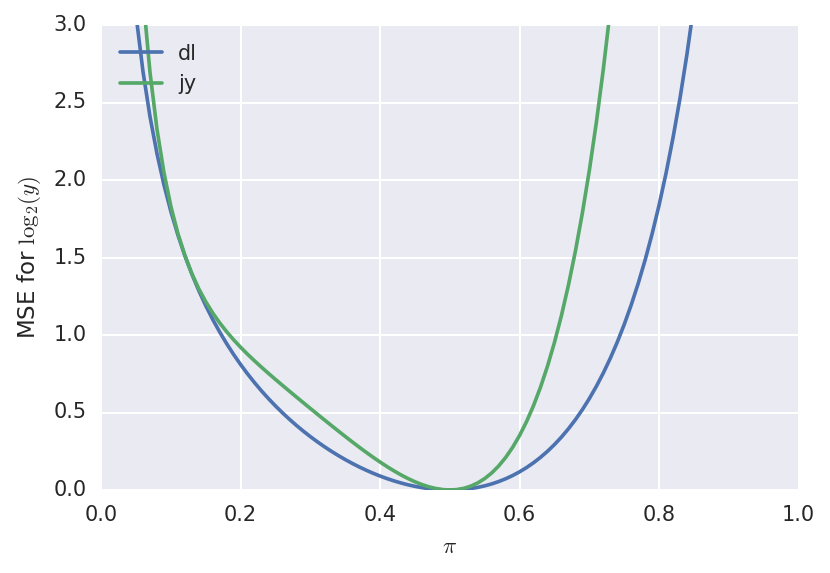

In [162]:
plt.plot(pi, np.sum(np.log2(y / y_exp)**2, axis=1), label="dl")
# plt.plot(pi, np.sum((y - y_exp_int)**2, axis=1), label="int")
plt.plot(pi, np.sum(np.log2(y / y_exp_jy)**2, axis=1), label="jy")
# plt.plot(pi, np.sum((y - y_exp_jy2)**2, axis=1), label="jy, pi > 0.5")

plt.ylim([0,3])
plt.xlim([0,1])
plt.xlabel("$\pi$")
plt.ylabel("MSE for $\log_2(y)$")
plt.legend(loc="upper left")

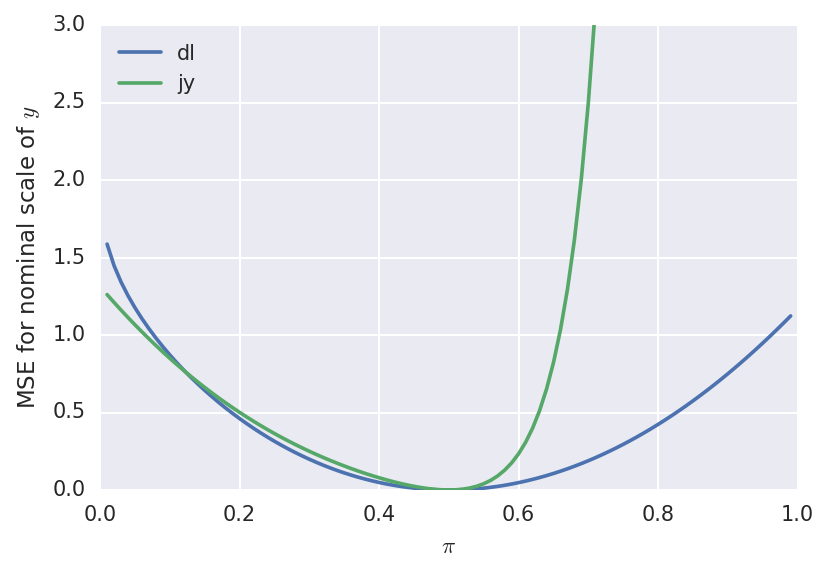

In [161]:
plt.plot(pi, np.sum((y - y_exp)**2, axis=1), label="dl")
# plt.plot(pi, np.sum((y - y_exp_int)**2, axis=1), label="int")
plt.plot(pi, np.sum((y - y_exp_jy)**2, axis=1), label="jy")
# plt.plot(pi, np.sum((y - y_exp_jy2)**2, axis=1), label="jy, pi > 0.5")

plt.ylim([0,3])
plt.xlim([0,1])
plt.xlabel("$\pi$")
plt.ylabel("MSE for nominal scale of $y$")
plt.legend(loc="upper left")

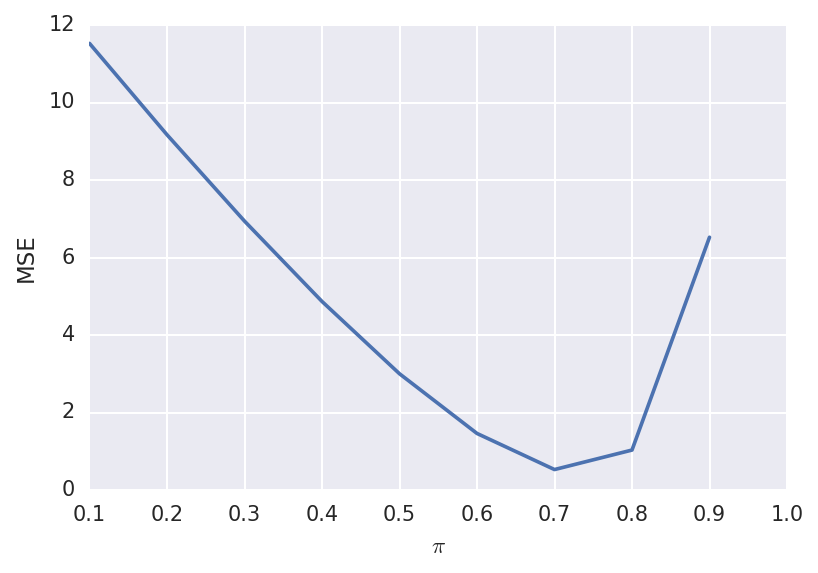

In [81]:
# -np.log2((2*(1-pi)))
-np.log2((2*(1-pi)))
plt.plot(pi, np.sum((y - )**2, axis=1))
plt.xlabel("$\pi$")
plt.ylabel("MSE")

In [48]:
pi

array([], shape=(0, 1), dtype=float64)

-0.928771237955


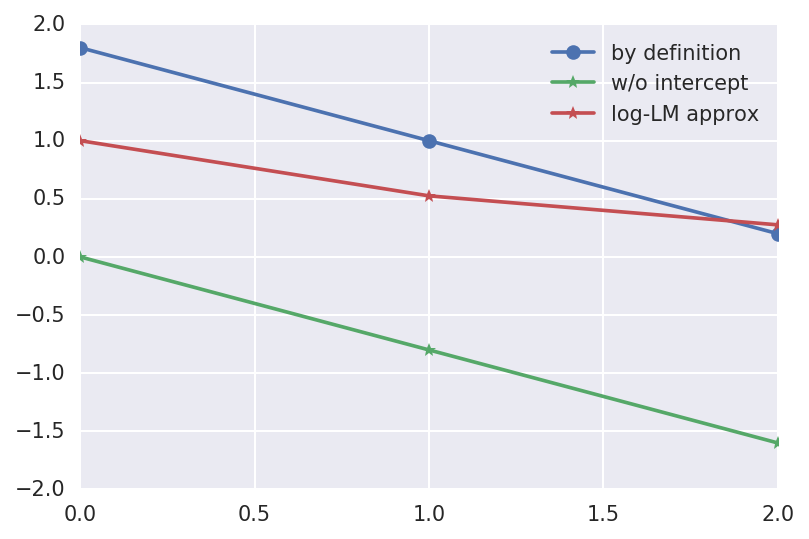

In [96]:
pi = .1

beta = (2*pi -1)
beta_exp = 0.4 * np.log2(2*pi)
print(beta_exp)

x = np.r_[0,1,2]
y = np.r_[2*(1-pi),1, 2*pi]
z = 1-(x-1)*(1-2*pi)
plt.plot(x,y, 'o-', label = "by definition")
# plt.plot(x,z, 'x-')
plt.plot(x, x*beta, '*-', label = "w/o intercept")

plt.plot(x, 2**(x*beta_exp), '*-', label = "log-LM approx")
plt.legend()